In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

tf.keras.backend.set_floatx('float32')

print("Imported the modules.")

Imported the modules.


In [3]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

scale_factor = 1000.0

train_df["median_house_value"] /= scale_factor

test_df["median_house_value"] /= scale_factor

train_df = train_df.reindex(np.random.permutation(train_df.index))

In [9]:
inputs={
    'latitude': tf.keras.layers.Input(name='latitude', shape=(1,), dtype='float32'),
    'longitude': tf.keras.layers.Input(name='longitude', shape=(1,), dtype='float32'),
}

In [10]:
def create_model(my_inputs, my_outputs, my_learning_rate):

  model = tf.keras.Model(inputs=my_inputs, outputs=my_outputs)

  # Construct the layers into a model that TensorFlow can execute.
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(
      learning_rate=my_learning_rate),
      loss="mean_squared_error",
      metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


def train_model(model, dataset, epochs, batch_size, label_name):
  """Feed a dataset into the model in order to train it."""

  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True)

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the mean absolute error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse   


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.94, rmse.max()* 1.05])
  plt.show()  

print("Defined the create_model, train_model, and plot_the_loss_curve functions.")

Defined the create_model, train_model, and plot_the_loss_curve functions.


Epoch 1/30
  1/170 [..............................] - ETA: 29s - loss: 160835.5781 - root_mean_squared_error: 401.0431

/home/franksitawa/anaconda3/lib/python3.10/site-packages/keras/src/engine/functional.py:639: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


170/170 [==============================] - 0s 724us/step - loss: 23860.1172 - root_mean_squared_error: 154.4672
Epoch 2/30
170/170 [==============================] - 0s 606us/step - loss: 13594.6826 - root_mean_squared_error: 116.5962
Epoch 3/30
170/170 [==============================] - 0s 617us/step - loss: 13546.1553 - root_mean_squared_error: 116.3880
Epoch 4/30
170/170 [==============================] - 0s 622us/step - loss: 13473.7988 - root_mean_squared_error: 116.0767
Epoch 5/30
170/170 [==============================] - 0s 614us/step - loss: 13440.8477 - root_mean_squared_error: 115.9347
Epoch 6/30
170/170 [==============================] - 0s 637us/step - loss: 13388.6211 - root_mean_squared_error: 115.7092
Epoch 7/30
170/170 [==============================] - 0s 591us/step - loss: 13334.7754 - root_mean_squared_error: 115.4763
Epoch 8/30
170/170 [==============================] - 0s 767us/step - loss: 13311.5635 - root_mean_squared_error: 115.3757
Epoch 9/30
170/170 [=======

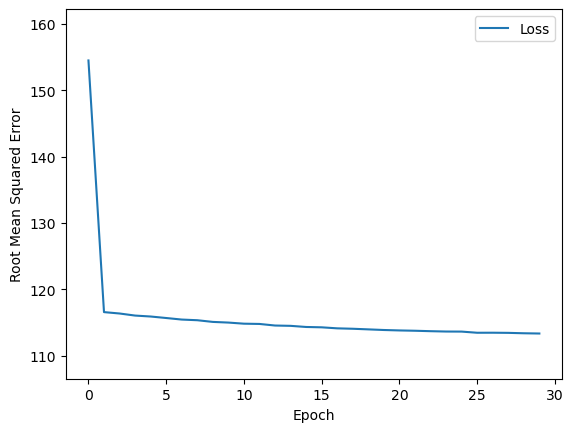


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 631us/step - loss: 12185.2949 - root_mean_squared_error: 110.3870


/home/franksitawa/anaconda3/lib/python3.10/site-packages/keras/src/engine/functional.py:639: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


[12185.294921875, 110.38702392578125]

In [11]:
# The following variables are the hyperparameters.
learning_rate = 0.05
epochs = 30
batch_size = 100
label_name = 'median_house_value'

# The two Input layers are concatenated so they can be passed as a single
# tensor to a Dense layer.
preprocessing_layer = tf.keras.layers.Concatenate()(inputs.values())

dense_output = layers.Dense(
    units=1,
    input_shape=(1,),
    name='dense_layer')(preprocessing_layer)

outputs = {
  'dense_output': dense_output
}

# Create and compile the model's topography.
my_model = create_model(inputs, outputs, learning_rate)

# To view a PNG of this model's layers, uncomment the call to
# `tf.keras.utils.plot_model` below. After running this code cell, click
# the file folder on the left, then the `my_model.png` file.
# tf.keras.utils.plot_model(my_model, "my_model.png", show_shapes=True)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

# Print out the model summary.
my_model.summary(expand_nested=True)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
test_features = {name:np.array(value) for name, value in test_df.items()}
test_label = np.array(test_features.pop(label_name))
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

In [ ]:
# No. Representing latitude and longitude as 
# floating-point values does not have much 
# predictive power. For example, neighborhoods at 
# latitude 35 are not 36/35 more valuable 
# (or 35/36 less valuable) than houses at 
# latitude 36.

# Representing `latitude` and `longitude` as 
# floating-point values provides almost no 
# predictive power. We're only using the raw values 
# to establish a baseline for future experiments 
# with better representations.

In [12]:
resolution_in_degrees = 1.0

# Create a list of numbers representing the bucket boundaries for latitude.
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), 
                                     int(max(train_df['latitude'])), 
                                     resolution_in_degrees))
print("latitude boundaries: " + str(latitude_boundaries))

# Create a Discretization layer to separate the latitude data into buckets.
latitude = tf.keras.layers.Discretization(
    bin_boundaries=latitude_boundaries,
    name='discretization_latitude')(inputs.get('latitude'))

# Number of categories is the length of latitude_boundaries plus one.
latitude = tf.keras.layers.CategoryEncoding(
    num_tokens=len(latitude_boundaries) + 1,
    output_mode='one_hot',
    name='category_encoding_latitude')(latitude)

# Create a list of numbers representing the bucket boundaries for longitude.
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), 
                                      int(max(train_df['longitude'])), 
                                      resolution_in_degrees))

print("longitude boundaries: " + str(longitude_boundaries))

# Create a Discretization layer to separate the longitude data into buckets.
longitude = tf.keras.layers.Discretization(
    bin_boundaries=longitude_boundaries,
    name='discretization_longitude')(inputs.get('longitude'))

# Number of categories is the length of longitude_boundaries plus one.
longitude = tf.keras.layers.CategoryEncoding(
    num_tokens=len(longitude_boundaries) + 1,
    output_mode='one_hot',
    name='category_encoding_longitude')(longitude)

# Concatenate latitude and longitude into a single tensor as input for the Dense layer.
concatenate_layer = tf.keras.layers.Concatenate()([latitude, longitude])

dense_output = layers.Dense(
    units=1, input_shape=(2,), name='dense_layer')(concatenate_layer)

# Define an output dictionary we'll send to the model constructor.
outputs = {
  'dense_output': dense_output
}

latitude boundaries: [32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0]
longitude boundaries: [-124.0, -123.0, -122.0, -121.0, -120.0, -119.0, -118.0, -117.0, -116.0, -115.0]


Epoch 1/35
170/170 [==============================] - 0s 655us/step - loss: 52112.8398 - root_mean_squared_error: 228.2824
Epoch 2/35
170/170 [==============================] - 0s 657us/step - loss: 44707.4219 - root_mean_squared_error: 211.4413
Epoch 3/35
170/170 [==============================] - 0s 648us/step - loss: 38118.1094 - root_mean_squared_error: 195.2386
Epoch 4/35
170/170 [==============================] - 0s 811us/step - loss: 32306.5371 - root_mean_squared_error: 179.7402
Epoch 5/35
170/170 [==============================] - 0s 682us/step - loss: 27293.9863 - root_mean_squared_error: 165.2089
Epoch 6/35
170/170 [==============================] - 0s 652us/step - loss: 23029.9902 - root_mean_squared_error: 151.7563
Epoch 7/35
170/170 [==============================] - 0s 652us/step - loss: 19508.2617 - root_mean_squared_error: 139.6720
Epoch 8/35
170/170 [==============================] - 0s 675us/step - loss: 16719.5449 - root_mean_squared_error: 129.3041
Epoch 9/35
170/1

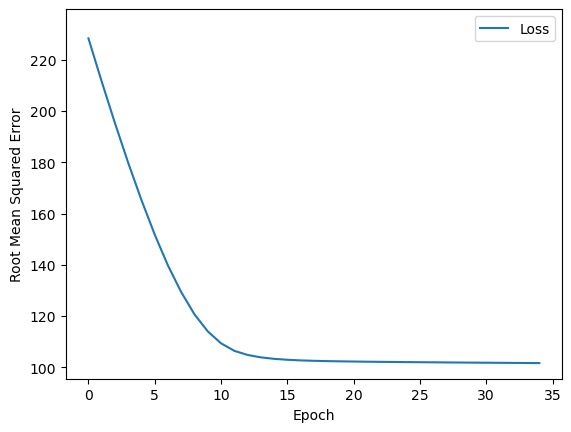


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 712us/step - loss: 10197.0430 - root_mean_squared_error: 100.9804


/home/franksitawa/anaconda3/lib/python3.10/site-packages/keras/src/engine/functional.py:639: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


[10197.04296875, 100.98040771484375]

In [13]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model.
my_model = create_model(inputs, outputs, learning_rate)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

# Print out the model summary.
my_model.summary(expand_nested=True)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

In [14]:
#@title Double-click for an answer to Task 2.

# Bucket representation outperformed 
# floating-point representations.  
# However, you can still do far better.

In [29]:
resolution_in_degrees = 0.4

# Create a list of numbers representing the bucket boundaries for latitude.
latitude_boundaries = list(np.arange(int(min(train_df['latitude'])), 
                                     int(max(train_df['latitude'])), 
                                     resolution_in_degrees))

# Create a Discretization layer to separate the latitude data into buckets.
latitude = tf.keras.layers.Discretization(
    bin_boundaries=latitude_boundaries,
    name='discretization_latitude')(inputs.get('latitude'))

# Create a list of numbers representing the bucket boundaries for longitude.
longitude_boundaries = list(np.arange(int(min(train_df['longitude'])), 
                                      int(max(train_df['longitude'])), 
                                      resolution_in_degrees))

# Create a Discretization layer to separate the longitude data into buckets.
longitude = tf.keras.layers.Discretization(
    bin_boundaries=longitude_boundaries,
    name='discretization_longitude')(inputs.get('longitude'))

# Cross the latitude and longitude features into a single one-hot vector.
feature_cross = tf.keras.layers.HashedCrossing(
    num_bins=len(latitude_boundaries) * len(longitude_boundaries), 
    output_mode='one_hot',
    name='cross_latitude_longitude')([latitude, longitude])

dense_output = layers.Dense(units=1, input_shape=(2,), 
                            name='dense_layer')(feature_cross)

# Define an output dictionary we'll send to the model constructor.
outputs = {
  'dense_output': dense_output
}

Epoch 1/35
170/170 [==============================] - 0s 743us/step - loss: 53692.0781 - root_mean_squared_error: 231.7155
Epoch 2/35
170/170 [==============================] - 0s 718us/step - loss: 48942.5547 - root_mean_squared_error: 221.2296
Epoch 3/35
170/170 [==============================] - 0s 778us/step - loss: 44487.7656 - root_mean_squared_error: 210.9212
Epoch 4/35
170/170 [==============================] - 0s 706us/step - loss: 40335.1094 - root_mean_squared_error: 200.8360
Epoch 5/35
170/170 [==============================] - 0s 696us/step - loss: 36479.0430 - root_mean_squared_error: 190.9949
Epoch 6/35
170/170 [==============================] - 0s 789us/step - loss: 32918.7734 - root_mean_squared_error: 181.4353
Epoch 7/35
170/170 [==============================] - 0s 758us/step - loss: 29625.5508 - root_mean_squared_error: 172.1207
Epoch 8/35
170/170 [==============================] - 0s 865us/step - loss: 26649.3086 - root_mean_squared_error: 163.2462
Epoch 9/35
170/1

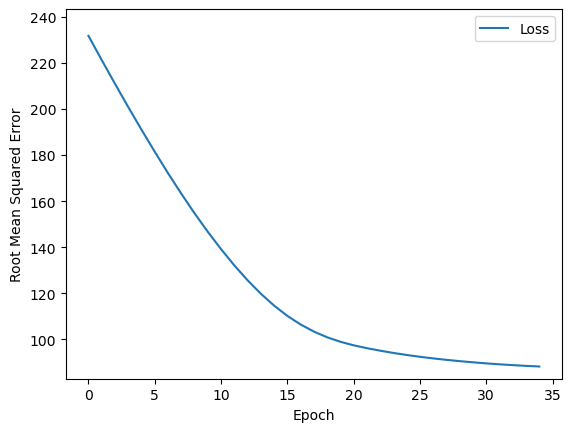


: Evaluate the new model against the test set:
30/30 [==============================] - 0s 745us/step - loss: 7851.1587 - root_mean_squared_error: 88.6068


/home/franksitawa/anaconda3/lib/python3.10/site-packages/keras/src/engine/functional.py:639: UserWarning: Input dict contained keys ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


[7851.15869140625, 88.60676574707031]

In [30]:
# The following variables are the hyperparameters.
learning_rate = 0.04
epochs = 35

# Build the model, this time passing in the feature_cross_feature_layer: 
my_model = create_model(inputs, outputs, learning_rate)

# Train the model on the training set.
epochs, rmse = train_model(my_model, train_df, epochs, batch_size, label_name)

# Print out the model summary.
my_model.summary(expand_nested=True)

plot_the_loss_curve(epochs, rmse)

print("\n: Evaluate the new model against the test set:")
my_model.evaluate(x=test_features, y=test_label, batch_size=batch_size)

In [31]:
#1. A resolution of ~0.4 degree provides the best 
#   results.

#2. Below ~0.4 degree, loss increases because the 
#   dataset does not contain enough examples in 
#   each cell to accurately predict prices for 
#   those cells.

#3. Postal code would be a far better feature 
#   than latitude X longitude, assuming that 
#   the dataset contained sufficient examples 
#   in each postal code.

In [17]:
# Yes, representing these features as a feature 
# cross produced much lower loss values than 
# representing these features as buckets